# Project 4, Git Practice, APS1070 Winter 2021 
#### **Linear Regression -  15 points**
**Deadline: April 10, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Alexander Cheng
*   Your **student number**: 1001634298



## Gradient Descent with Additional Features and Regularization [2 marks + 1 mark Git submission]

We'll apply linear regresssion to a toy dataset (`LR_data.csv`), with 10 features `x1`-`x10` and a "measurement" `y`. We'll take a few shortcuts by using built-in sklearn functions.

1. Data Preparation **[0.5]**
  * Print the dataset, and create Numpy arrays with inputs (X) and outputs (y). 
  * Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.

2. Linear Regression **[0.5]**
  * Standardize the data using StandardScaler from sklearn.
  * Use the `sklearn.linear_model.LinearRegression` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform linear regression.
  * Print the RMSE for training and validation data.

3. Linear Regression with Additional Features **[0.5]**
  * Let's add more features to our dataset (degree 8) using `sklearn.preprocessing.PolynomialFeatures` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). You'll want to create the additional features first, then perform standardization (start from non-standardized data).
  * Again, use `sklearn.linear_model.LinearRegression` to perform linear regression.
  * Print the RMSE for training and validation data.

4. Linear Regression with Additional Features and Regularization **[0.5]**
  * Let's switch models, and instead use the `sklearn.linear_model.Ridge` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) to perform linear regression with regularization. Apply the model to the processed data (additional, standardized) you used in 3 above. Use a `FOR` loop to run `sklearn.linear_model.Ridge` with different `alpha` values. Specifically, sweep `alpha` from 1E-2 to 1E10 (each step is an order of magnitude jump).

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/LR_data.csv" , skipinitialspace=True)

In [ ]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.454481,4.940543,7.116015,3.805131,4.105432,1.832290,5.211909,5.088293,3.841250,6.121133,6.575066e+06
1,4.907182,1.653654,7.339445,9.065282,7.169233,2.354136,2.893005,8.720131,8.646473,3.806860,8.419881e+06
2,1.842804,1.183878,4.203206,6.815847,6.655899,8.295816,3.556779,5.794679,3.260723,5.463808,9.745537e+04
3,2.393457,0.094127,3.208929,0.497443,4.318127,4.999247,9.470238,3.061990,7.312995,5.475240,1.129200e+04
4,5.093724,3.905293,4.858562,4.465484,0.947091,9.410307,8.137329,9.043838,9.128607,0.790795,3.105448e+05
...,...,...,...,...,...,...,...,...,...,...,...
195,2.936450,2.094812,9.493814,3.411240,4.350940,0.386062,1.303290,2.699563,7.622569,3.037162,6.599726e+07
196,4.915597,1.953974,7.312552,9.331203,1.329366,8.286760,5.233018,7.476923,7.043560,5.745565,8.176250e+06
197,6.772096,6.406489,4.638352,7.042340,0.912338,7.568296,1.194928,2.592840,9.386478,4.147710,2.144147e+05
198,3.940339,4.330498,6.693371,9.169265,0.858846,0.601942,2.635455,2.037859,7.883720,8.525164,4.028735e+06


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
X = np.array(df.drop('y', 1)) #Inputs as np array
y = np.array(df['y']) #Outputs as np array

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('y', 1), df['y'], test_size = 0.2, random_state = 1)

In [ ]:
#Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [ ]:
#Add a columns of 1s

X_train_std = np.hstack((np.ones([len(X_train_std), 1]), X_train_std))
X_valid_std = np.hstack((np.ones([len(X_valid_std), 1]), X_valid_std))

In [ ]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [ ]:
#Linear Regression (Direct Solution)

reg = LinearRegression().fit(X_train_std, y_train)  
y_train_Pred = reg.predict(X_train_std)
y_valid_Pred = reg.predict(X_valid_std)

rmse_train = rmse(y_train_Pred, y_train)
rmse_valid = rmse(y_valid_Pred, y_valid)

print("Training RMSE: ", rmse_train)
print("Validation RMSE: ", rmse_valid)

Training RMSE:  16296980.655667374
Validation RMSE:  14061578.864980092


We see that linear regression isn't very accurate, it doesn't follow a linear model. Underfitting, both the training and validation rmse is very high.

In [ ]:
#Linear Regression with extra Features

#Adding extra features using poly function to standardize data
poly = PolynomialFeatures(8)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

#Standardize data
scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_std = scaler.transform(X_train_poly)
X_valid_poly_std = scaler.transform(X_valid_poly)

#Adding columns of 1s
X_train_std[:, 0] = np.ones(len(X_train_poly_std))
X_valid_std[:, 0] = np.ones(len(X_valid_poly_std))

#Linear regression
regpoly = LinearRegression().fit(X_train_poly_std, y_train)  
y_train_poly_Pred = regpoly.predict(X_train_poly_std)
y_valid_poly_Pred = regpoly.predict(X_valid_poly_std)

rmse_poly_train = rmse(y_train_poly_Pred, y_train)
rmse_poly_valid = rmse(y_valid_poly_Pred, y_valid)

print("Training RMSE: ", rmse_poly_train)
print("Validation RMSE: ", rmse_poly_valid)

Training RMSE:  1.1154878119198678e-07
Validation RMSE:  10920908.905406754


Seems to be overfitting. The training rmse is very low, but the validation rmse is very high.

Training RMSE:  321.012409163099
Validation RMSE:  10919504.125893764
Training RMSE:  3199.3496468416506
Validation RMSE:  10916171.329033064
Training RMSE:  30988.518341657847
Validation RMSE:  10884651.018827904
Training RMSE:  248080.3696494477
Validation RMSE:  10659707.103878867
Training RMSE:  1196923.6228686073
Validation RMSE:  9484394.22011948
Training RMSE:  3609078.2596920887
Validation RMSE:  5633182.875138311
Training RMSE:  7712389.432217537
Validation RMSE:  4521905.583502402
Training RMSE:  14600498.520348776
Validation RMSE:  10502863.775565729
Training RMSE:  20036025.00599003
Validation RMSE:  16057627.104454402
Training RMSE:  22910819.324746832
Validation RMSE:  18700005.54478621
Training RMSE:  23435716.156519353
Validation RMSE:  19178033.464494962
Training RMSE:  23494007.189870406
Validation RMSE:  19231116.414978746
Training RMSE:  23499904.341360077
Validation RMSE:  19236486.536391094


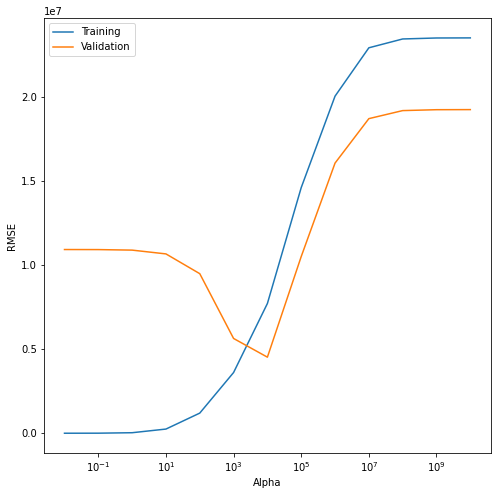

In [ ]:
# Linear Regression with Additional Features and Regularization

rmse_train_P4 = np.ones(13)
rmse_valid_P4 = np.ones(13)
alpha = np.ones(13)

#Plot for different values of alpha
for i in range(0, 13):
  alpha[i] = 0.01 * 10**i
  #Ridge function includes regularization 
  clf = Ridge(alpha = alpha[i])
  clf.fit(X_train_poly_std, y_train)
  y_train_poly_clf_Pred = clf.predict(X_train_poly_std)
  y_valid_poly_clf_Pred = clf.predict(X_valid_poly_std)

  rmse_train_P4[i] = rmse(y_train_poly_clf_Pred, y_train)
  rmse_valid_P4[i] = rmse(y_valid_poly_clf_Pred, y_valid)

  print("Training RMSE: ", rmse_train_P4[i])
  print("Validation RMSE: ", rmse_valid_P4[i])

fig = plt.figure(figsize = (8, 8))
plt.plot(alpha, rmse_train_P4, label = 'Training')
plt.plot(alpha, rmse_valid_P4, label = 'Validation')
plt.xlabel("Alpha")
plt.xscale("log")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Linear regression may not be the best method for this problem since it has very high RMSE for the validation data. 
RMSE for training data is smaller for smaller values of alpha. However, this doesn't correspond to the validation rmse. 
The smallest validation rmse is 4521905 at an alpha of 10,000.
This model seems to be underfitting since the training rmse is also very high for large values of alpha. 
The validation rmse decreases with regularization but the training rmse increased. P3 model was overfitting. 